In [3]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("sales_data_with_discounts.csv")
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [8]:
numeric_cols = df.select_dtypes(include=['number']).columns
numeric_cols

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [23]:
summary = {
    'mean': df[numeric_cols].mean(),
    'median': df[numeric_cols].median(),
    'mode': df[numeric_cols].mode().iloc[0],   # taking first mode
    'std': df[numeric_cols].std()
}
summary_df = pd.DataFrame(summary)
print(summary_df)


                           mean       median          mode           std
Volume                 5.066667     4.000000      3.000000      4.231602
Avg Price          10453.433333  1450.000000    400.000000  18079.904840
Total Sales Value  33812.835556  5700.000000  24300.000000  50535.074173
Discount Rate (%)     15.155242    16.577766      5.007822      4.220602
Discount Amount     3346.499424   988.933733     69.177942   4509.902963
Net Sales Value    30466.336131  4677.788059    326.974801  46358.656624


In [ ]:
'''
1. Volume

Mean: 5.07
Median: 4
Mode: 3
Std: 4.23

Interpretation
 - Most transactions involve small quantities (3–4 units).
 - Mean is slightly higher than the median, a few large volume transactions are pulling the average up.
 - Standard deviation is almost as large as the mean, high variability in volume.
 - Some customers buy very small amounts, while others buy unusually high quantities, a long tail distribution.


2. Avg Price

Mean: 10,453
Median: 1,450
Mode: 400
Std: 18,079

Interpretation
 - The mean average price and the median have a huge difference. And the Average Price is extemely skewed
 - The mean is inflated due to some extremely high average prices.
 - Standard Deviation > mean, the Average price has some frequent outliers. 


 3. Total Sales Value

Mean: 33,813
Median: 5,700
Mode: 24,300
Std: 50,535

Interpretation
 - The distribution is very wide and highly skewed.
 - Majority of sales values are much lower than the mean.
 - Some transactions involve very large purchase amounts, pulling the mean up.
 - Very high standard deviation (50,535) indicates volatile, inconsistent sale sizes.
 - This column appears to be influenced by big one-off transactions.

 
4. Discount Rate (%)

Mean: 15.16%
Median: 16.58%
Mode: 5%
Std: 4.22

Interpretation
 - Discounts are generally around 15–17%.
 - Mode is 5%, suggesting many items receive a small discount, but most transactions hover around the 15–17% range.
 - Standard eviation is moderate (4.22), discount rates are somewhat consistent, but some variability exists (5% vs 20%+).

 
 5. Discount Amount

Mean: 3,346
Median: 989
Mode: 69
Std: 4,510

Interpretation
 - The typical discount is very low (median ≈ 1000 and mode = 69).
 - The mean is much higher because a few transactions have very large discounts.
 - High standard deviation, discount values vary heavily depending on transaction size.


 6. Net Sales Value

Mean: 30,466
Median: 4,677
Mode: 327
Std: 46,359

Interpretation
 - Net sales follow the same pattern as total sales, high inequality in transaction size.
 - Most transactions are small (median ~4,700), and the most common value is only 327.
 - Mean is extremely inflated due to a few massive transactions.
 - Standard deviation is very large, showing strong variability.

'''

In [9]:
numeric_cols

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [21]:
df["Volume"].mode()

0    3
Name: Volume, dtype: int64

Text(0.5, 1.0, 'Volume')

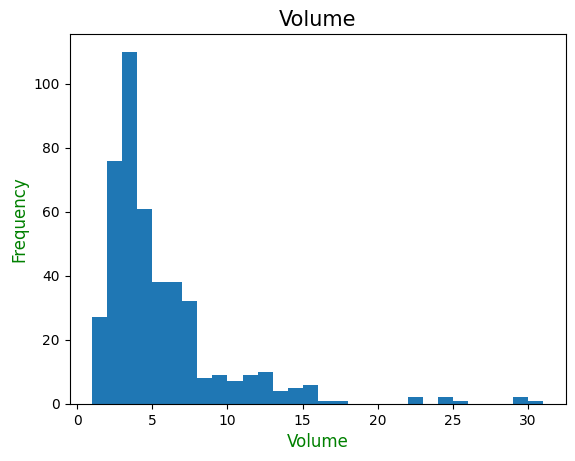

In [52]:
plt.hist(df["Volume"], bins=30)
plt.xlabel("Volume", color="green", size=12)
plt.ylabel("Frequency", color="green", size=12)
plt.title("Volume", color="black", size=15)

In [ ]:
'''
 - The graph seems to be skewed to the right, and there are some presence of outliers ranging volume 15-30.
 - The most commonly sold volumes are in number between 2 to 5, with frequency going up to 70 - 110.
 - Since it is skewed to the right, using median instead of mean for analyzing would be a more optimal approach.
 '''

Text(0.5, 1.0, 'Volume')

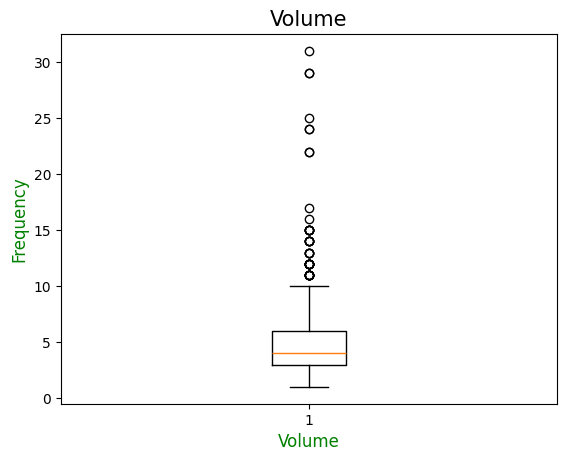

In [32]:
plt.boxplot(df["Volume"])
plt.xlabel("Volume", color="green", size=12)
plt.ylabel("Frequency", color="green", size=12)
plt.title("Volume", color="black", size=15)

In [ ]:
'''
 - The box plot graph confirms the insights that we had earlier for the histogram.
 - There are more number of outliers, like between 5 - 20, this tends to inflate the mean more.
 - The outliers can be replaced for better analyzing the data
'''

Text(0.5, 1.0, 'Avg Price')

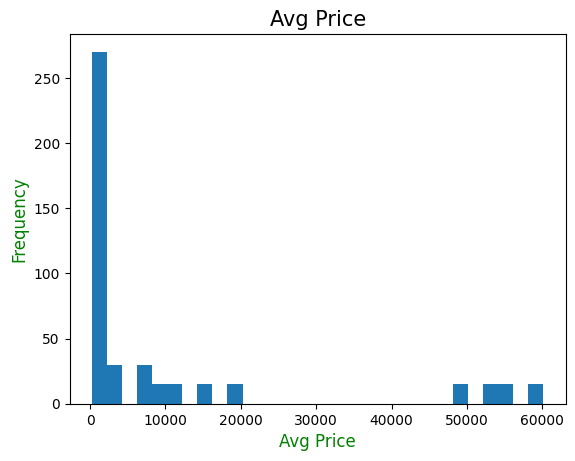

In [35]:
plt.hist(df["Avg Price"], bins=30)
plt.xlabel("Avg Price", color="green", size=12)
plt.ylabel("Frequency", color="green", size=12)
plt.title("Avg Price", color="black", size=15)

In [ ]:
'''
 - The distribution is highly right-skewed, with a few extremely high prices pulling the tail far to the right.
 - Most Avg Price values fall in the low range (0–2000), indicating this is the typical price segment.
 - Very high outliers (10000 – 60000) compress the left side of the histogram and inflate mean and standard deviation.
 - Applying log transformation or removing outliers would make the distribution more interpretable and model-friendly.
'''

Text(0.5, 1.0, 'Avg Price')

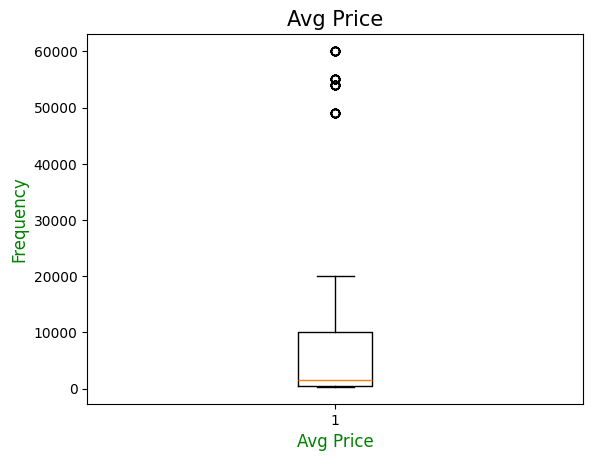

In [36]:
plt.boxplot(df["Avg Price"])
plt.xlabel("Avg Price", color="green", size=12)
plt.ylabel("Frequency", color="green", size=12)
plt.title("Avg Price", color="black", size=15)

In [ ]:
'''
 - The boxplot shows strong right skew, with most Avg Price values concentrated near the lower end.
 - Several outliers (50000 – 60000) are far above the limits, indicating unusually high prices.
 - The IQR covers a relatively small range compared to the outliers, showing that typical prices are much lower.
 - Removing or transforming these high-value outliers would greatly stabilize the distribution for analysis.
'''

Text(0.5, 1.0, 'Total Sales Value')

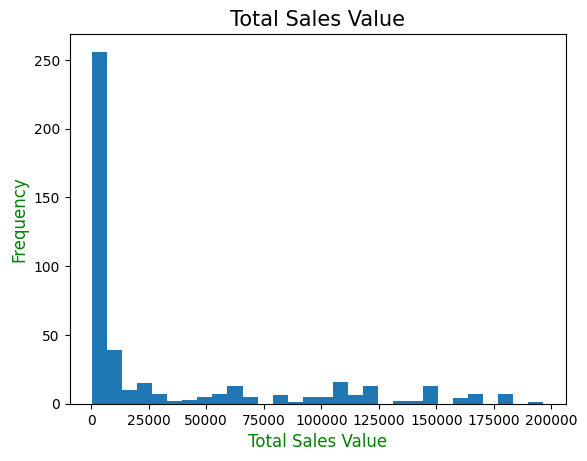

In [37]:
plt.hist(df["Total Sales Value"], bins=30)
plt.xlabel("Total Sales Value", color="green", size=12)
plt.ylabel("Frequency", color="green", size=12)
plt.title("Total Sales Value", color="black", size=15)

In [ ]:
'''
 - The distribution is extremely right skewed, with most Total Sales Values concentrated near the very low end
 - A long tail stretches toward very high values (up to 200000), indicating many large outliers.
 - The heavy spread of high sales values compresses the lower range, making the typical pattern harder to see.
'''

Text(0.5, 1.0, 'Total Sales Value')

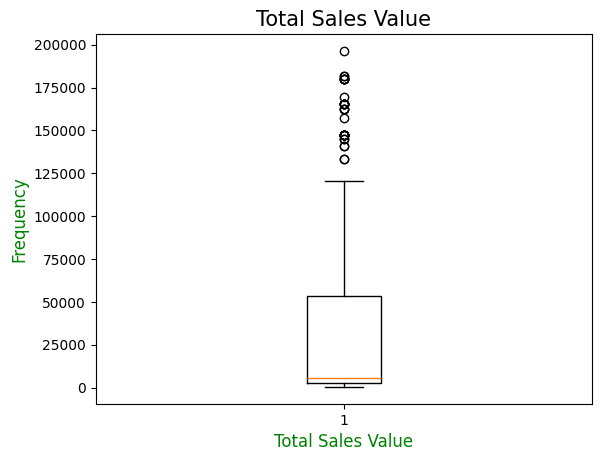

In [38]:
plt.boxplot(df["Total Sales Value"])
plt.xlabel("Total Sales Value", color="green", size=12)
plt.ylabel("Frequency", color="green", size=12)
plt.title("Total Sales Value", color="black", size=15)

In [ ]:
'''
 - The boxplot shows a strong right skew, with most Total Sales Values clustered near the lower end.
 - Numerous extreme outliers (100000 – 200000) sit far above the whiskers, indicating very large sales spikes.
 - The IQR is small compared to the outlier range, meaning typical sales are much lower than the extreme cases.
'''

Text(0.5, 1.0, 'Discount Rate (%)')

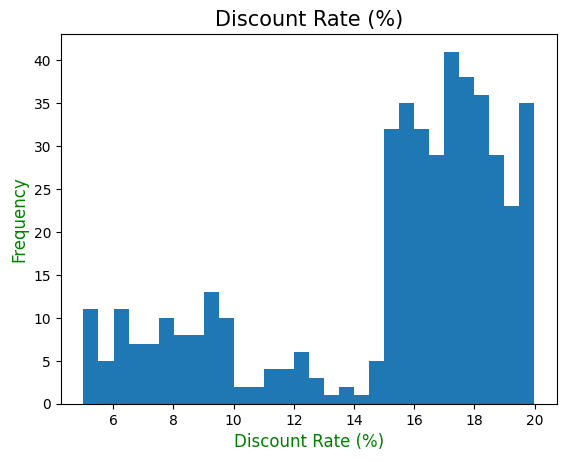

In [39]:
plt.hist(df["Discount Rate (%)"], bins=30)
plt.xlabel("Discount Rate (%)", color="green", size=12)
plt.ylabel("Frequency", color="green", size=12)
plt.title("Discount Rate (%)", color="black", size=15)

In [ ]:
'''
 - The distribution appears to be bimodal, with one cluster around 6–10% and another around 15–20%.
 - The higher discount range (15–20%) has much more frequency, indicating it is the dominant discount strategy.
 - Very few observations fall between 12–14%, creating a noticeable dip in the middle.
 - The spread is wide, showing that discount rates vary significantly across products or transactions.
'''

Text(0.5, 1.0, 'Discount Rate (%)')

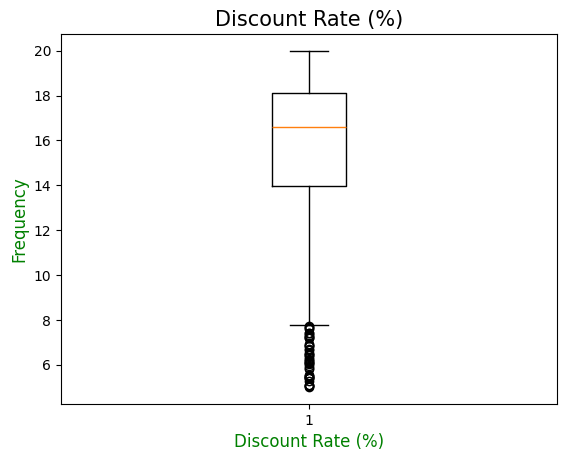

In [40]:
plt.boxplot(df["Discount Rate (%)"])
plt.xlabel("Discount Rate (%)", color="green", size=12)
plt.ylabel("Frequency", color="green", size=12)
plt.title("Discount Rate (%)", color="black", size=15)

In [ ]:
'''
 - The boxplot shows most discount rates lie between 14% and 19%, with a median around 16–17%.
 - A cluster of lower discounts (5–8%) appears as outliers, indicating a small set of low rates, indicating there is a limited compromise on profit.
 - The limit extend further downward than upward, reflecting mild left skew caused by those low values.
 - Overall, most discounts are relatively high, with only a few unusually small ones pulling the lower tail
'''

Text(0.5, 1.0, 'Discount Amount')

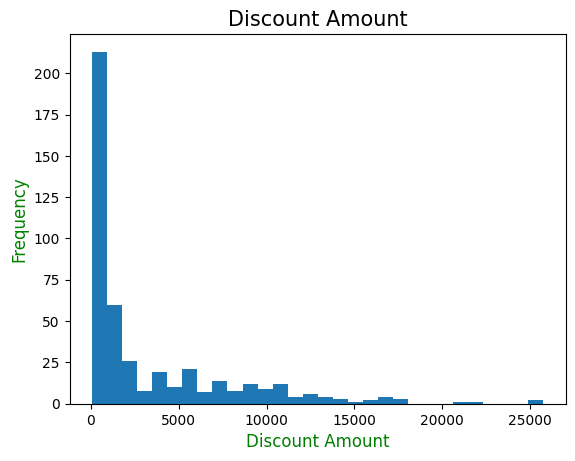

In [41]:
plt.hist(df["Discount Amount"], bins=30)
plt.xlabel("Discount Amount", color="green", size=12)
plt.ylabel("Frequency", color="green", size=12)
plt.title("Discount Amount", color="black", size=15)

In [ ]:
'''
 - The distribution is heavily right-skewed, with most discount amounts concentrated near very small values.
 - A long tail extends toward high discounts (up to 25000), indicating several large outliers.
 - The high outliers compress the lower range, making small-value patterns less visible.
'''

Text(0.5, 1.0, 'Discount Amount')

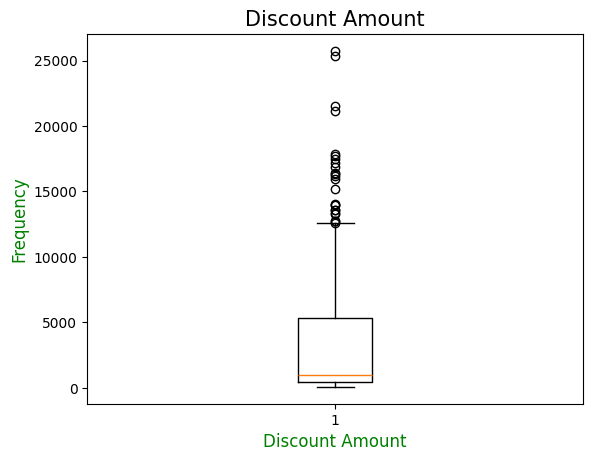

In [42]:
plt.boxplot(df["Discount Amount"])
plt.xlabel("Discount Amount", color="green", size=12)
plt.ylabel("Frequency", color="green", size=12)
plt.title("Discount Amount", color="black", size=15)

In [ ]:
'''
 - The boxplot shows most discount amounts concentrated at lower values, with the median very close to the bottom of the box.
 - A large number of extreme outliers extend upward (10000 – 25000), indicating unusually high discount amounts.
 - The limits stretch far upward compared to downward, reflecting strong right skew.
 - These high-value outliers heavily influence variability and may require handling for cleaner analysis.
'''

Text(0.5, 1.0, 'Net Sales Value')

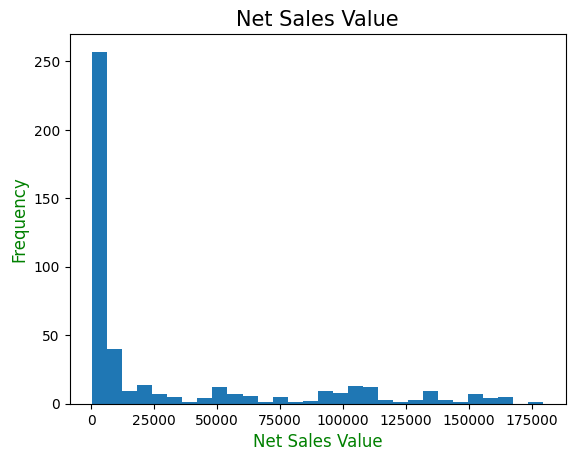

In [43]:
plt.hist(df["Net Sales Value"], bins=30)
plt.xlabel("Net Sales Value", color="green", size=12)
plt.ylabel("Frequency", color="green", size=12)
plt.title("Net Sales Value", color="black", size=15)

In [ ]:
'''
 - The distribution is heavily right-skewed, with most Net Sales Values concentrated near very small amounts.
 - A long tail extends toward extremely large values (up to 180000), indicating several high-value outliers.
 - These outliers compress the lower range, making finer patterns in typical sales hard to observe.
'''

Text(0.5, 1.0, 'Net Sales Value')

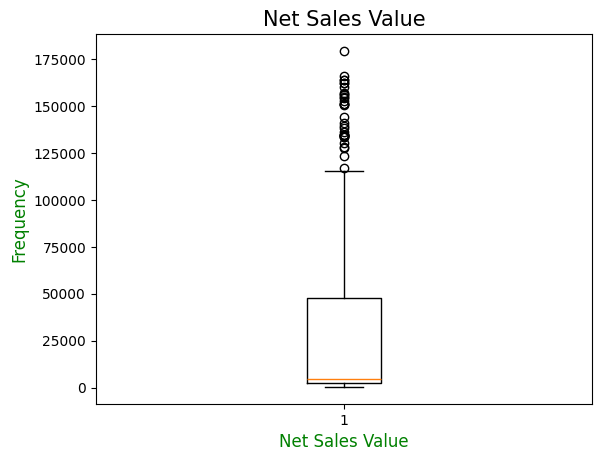

In [44]:
plt.boxplot(df["Net Sales Value"])
plt.xlabel("Net Sales Value", color="green", size=12)
plt.ylabel("Frequency", color="green", size=12)
plt.title("Net Sales Value", color="black", size=15)

In [ ]:
'''
 - Most Net Sales Values lie in the lower range, with the median sitting very close to the bottom of the box.
 - A large number of extreme outliers (120000 – 180000) dominate the upper tail, showing unusually high sales amounts.
 - The whiskers stretch far upward, reflecting strong right skew driven by these high-value cases.
 - These extreme outliers heavily influence variability and may require treatment for more stable analysis.
'''

In [53]:
df.select_dtypes(include=['object'])

,Date,Day,SKU,City,BU,Brand,Model
0,01-04-2021,Thursday,M01,C,Mobiles,RealU,RU-10
1,01-04-2021,Thursday,M02,C,Mobiles,RealU,RU-9 Plus
2,01-04-2021,Thursday,M03,C,Mobiles,YouM,YM-99
3,01-04-2021,Thursday,M04,C,Mobiles,YouM,YM-99 Plus
4,01-04-2021,Thursday,M05,C,Mobiles,YouM,YM-98
...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,Lifestyle,Jeera,M-Casuals
446,15-04-2021,Thursday,L07,C,Lifestyle,Viva,W-Western
447,15-04-2021,Thursday,L08,C,Lifestyle,Viva,W-Lounge
448,15-04-2021,Thursday,L09,C,Lifestyle,Jeera,M-Formals


Text(0.5, 1.0, 'Days')

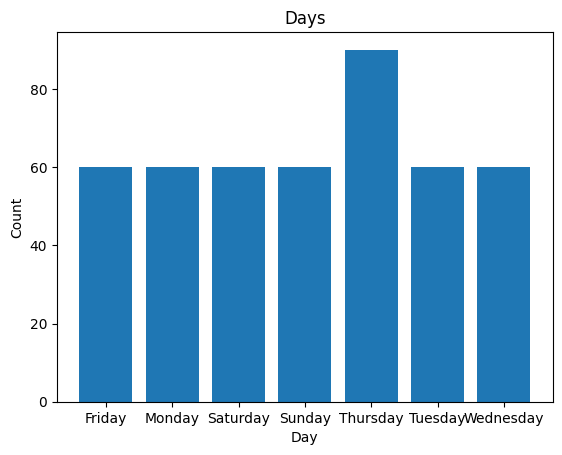

In [ ]:
counts = df['Day'].value_counts().sort_index()
plt.bar(counts.index, counts.values)
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Days')

In [ ]:
'''
 - Sales are more frequent on Thursdays. Unless there is some special discount price on thursdays, it would be more optimal to be selling on weekends for more customers turning up.
'''

Text(0.5, 1.0, 'SKU')

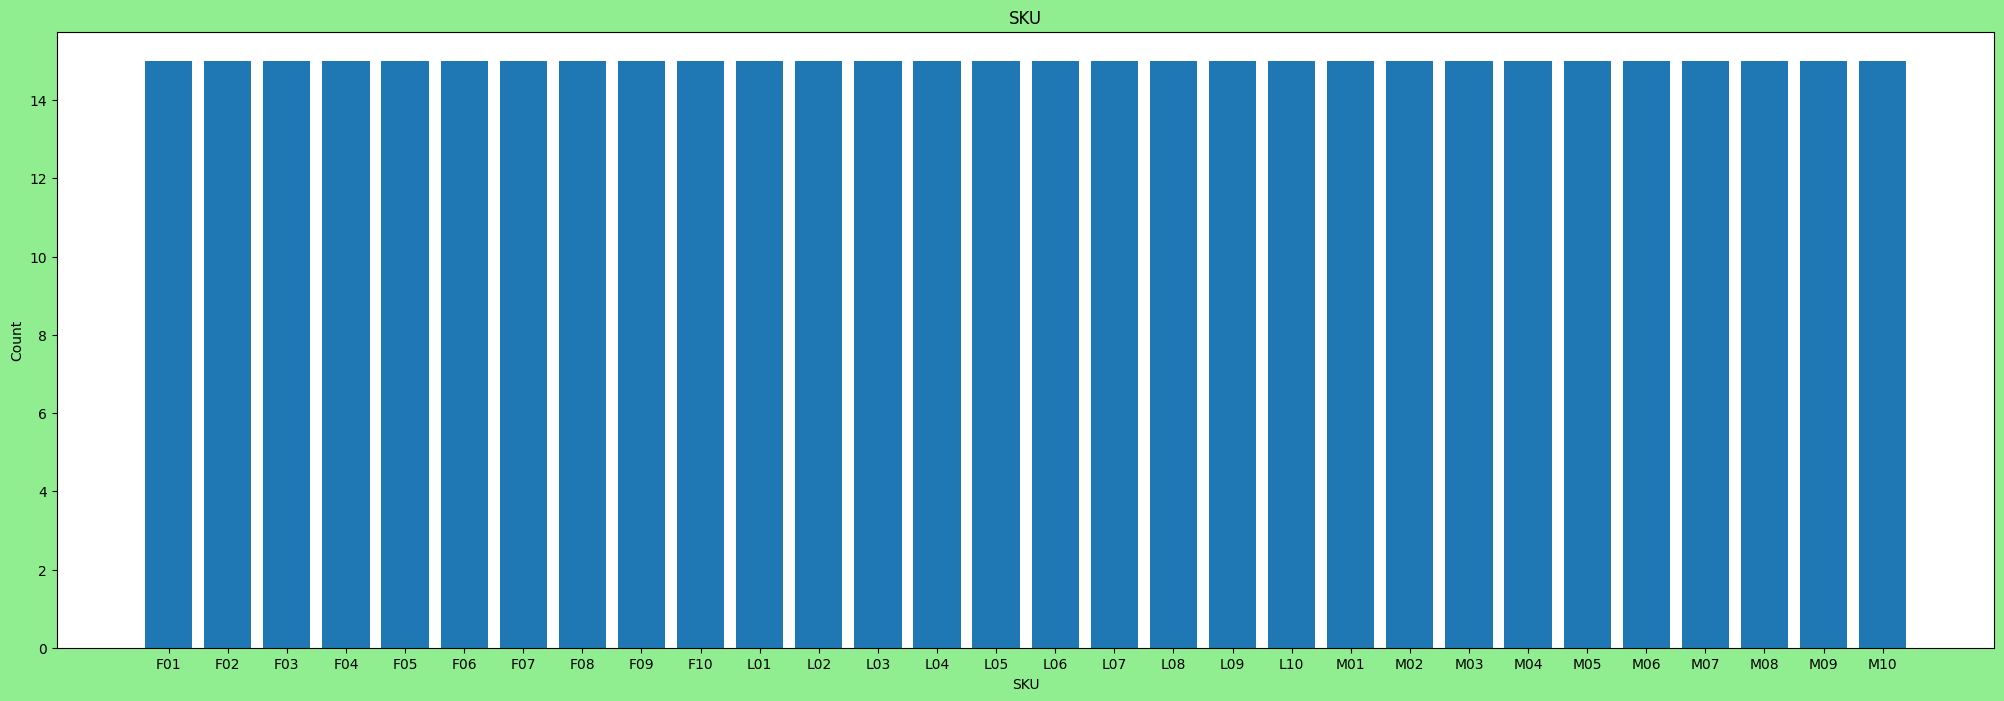

In [87]:
counts = df['SKU'].value_counts().sort_index()
plt.figure(figsize=(25,8), facecolor="lightgreen")
plt.bar(counts.index, counts.values)
plt.xlabel('SKU')
plt.ylabel('Count')
plt.title('SKU')

In [ ]:
'''
 - The SKU sold are uniform, with every SKU sold uniformly. 
'''

Text(0.5, 1.0, 'City')

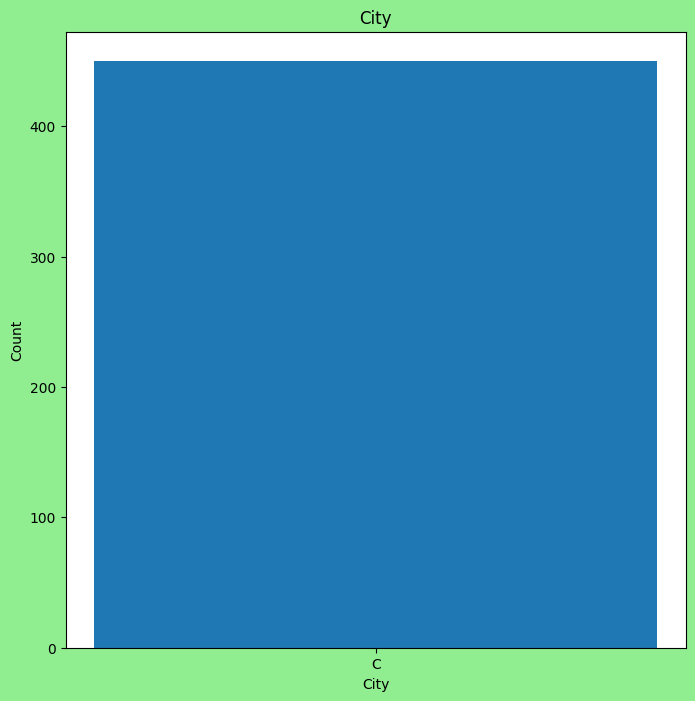

In [88]:
counts = df['City'].value_counts().sort_index()
plt.figure(figsize=(8,8), facecolor="lightgreen")
plt.bar(counts.index, counts.values)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('City')

In [ ]:
'''
 - The volume are sold in only one city. Implying that there no franchises across multiple cities. The advice would be to invest on multiple franchises with better profit.
'''

Text(0.5, 1.0, 'BU')

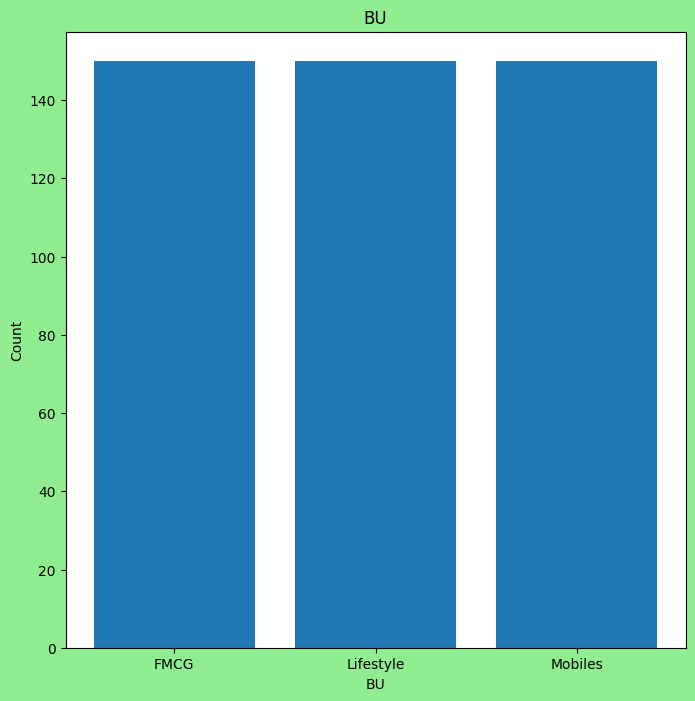

In [89]:
counts = df['BU'].value_counts().sort_index()
plt.figure(figsize=(8,8), facecolor="lightgreen")
plt.bar(counts.index, counts.values)
plt.xlabel('BU')
plt.ylabel('Count')
plt.title('BU')

In [ ]:
'''
 - All three Business Units (FMCG, Lifestyle, Mobiles) have almost identical counts, indicating a perfectly balanced dataset.
'''

Text(0.5, 1.0, 'Brand')

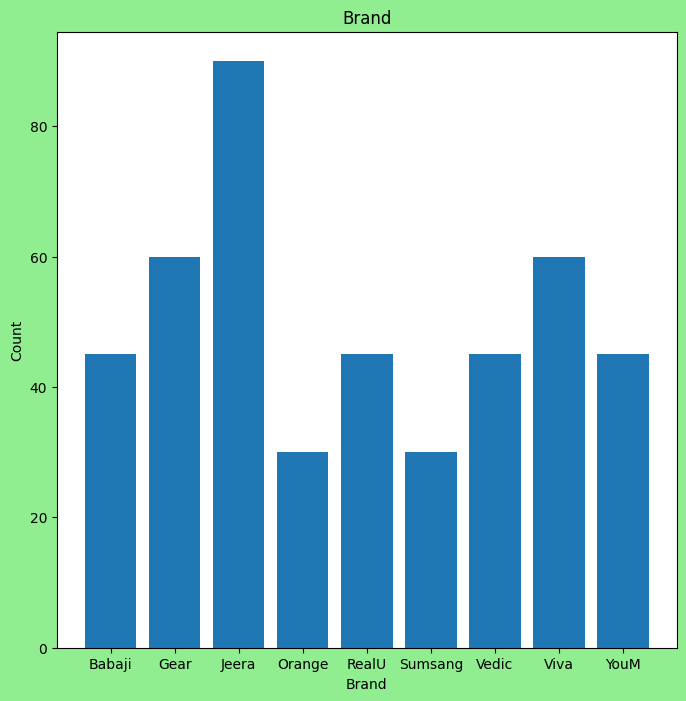

In [90]:
counts = df['Brand'].value_counts().sort_index()
plt.figure(figsize=(8,8), facecolor="lightgreen")
plt.bar(counts.index, counts.values)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Brand')

In [ ]:
'''
 - Brand counts vary noticeably, with Jeera having the highest representation and Orange/Sumsang the lowest.
 - This imbalance may encourage brand level analysis and should be considered when comparing performance.
'''

Text(0.5, 1.0, 'Model')

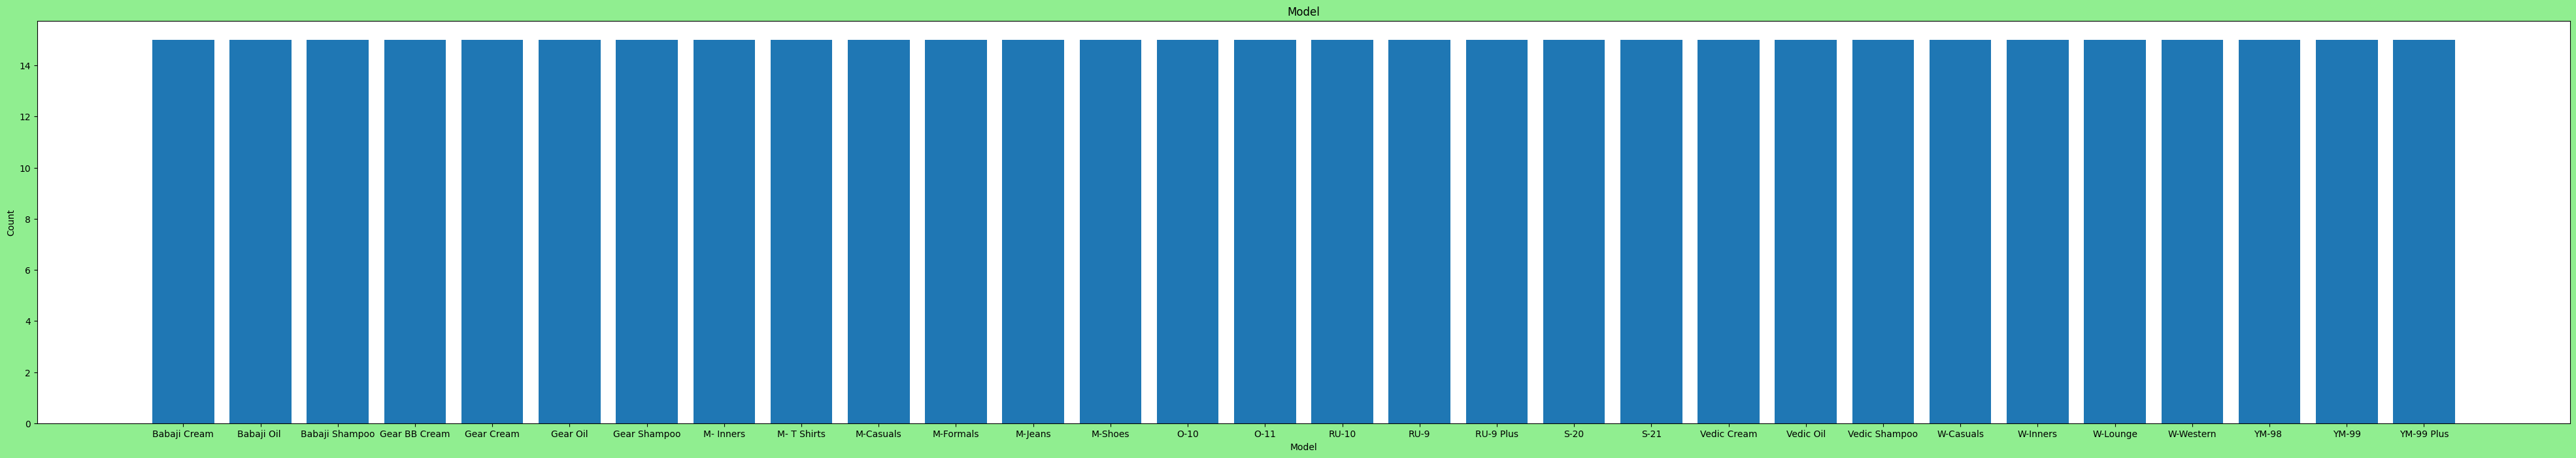

In [94]:
counts = df['Model'].value_counts().sort_index()
plt.figure(figsize=(50,8), facecolor="lightgreen")
plt.bar(counts.index, counts.values)
plt.xlabel('Model')
plt.ylabel('Count')
plt.title('Model')

In [ ]:
'''
 - All models have equal counts, indicating a perfectly uniform distribution across all model categories.
'''